# Load data

In [120]:
import pandas as pd
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)

# Data exploration

## Descriptive statistics

### Numerical features

In [121]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols].describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


Conclusion:
Minimum number of points is 80. We can represent score as 0-20 instead of 80-100.

#### Correlation

In [122]:
pearson = df[num_cols].corr(method='pearson')
spearman = df[num_cols].corr(method='spearman')
display(pearson)
display(spearman)

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


,points,price
points,1.000000,0.605785
price,0.605785,1.000000


#### Outliers

In [123]:
outlier_summary = []
for c in num_cols:
    s = df[c].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_out_idx = s[(s < lower) | (s > upper)].index
    z = (s - s.mean()) / s.std()
    z_out_idx = s[ (z.abs() > 3) ].index
    outlier_summary.append({
        'variable': c,
        'n': len(s),
        'iqr_outliers': len(iqr_out_idx),
        'z_outliers': len(z_out_idx),
        'iqr_bounds': (lower, upper)
    })

outlier_df = pd.DataFrame(outlier_summary).set_index('variable')
display(outlier_df)

,n,iqr_outliers,z_outliers,iqr_bounds
variable,,,,
points,129971,52,129,"(78.5, 98.5)"
price,120975,7241,1177,"(-20.5, 79.5)"


##### Example outliers

In [124]:
key_feats = ['price','points']
for feat in key_feats:
    s = df[feat].dropna()
    q1, q3 = s.quantile([0.25,0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    iqr_idx = s[(s < lower) | (s > upper)].index
    z = (s - s.mean()) / s.std()
    z_idx = s[(z.abs() > 3)].index
    print(f"\nFeature: {feat}")
    print(f"IQR bounds: {lower:.3f} - {upper:.3f} | IQR outliers: {len(iqr_idx)}")
    print("Sample IQR outlier rows (up to 5):")
    display(df.loc[iqr_idx].head())
    print(f"Z-score outliers (>3 or <-3): {len(z_idx)}; sample rows:")
    display(df.loc[z_idx].head())


Feature: price
IQR bounds: -20.500 - 79.500 | IQR outliers: 7241
Sample IQR outlier rows (up to 5):


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
60,US,"Syrupy and dense, this wine is jammy in plum a...",Estate,86,100.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Okapi 2013 Estate Cabernet Sauvignon (Napa Val...,Cabernet Sauvignon,Okapi
111,US,This 100% varietal wine opens in a heady aroma...,Wolff Vineyard,87,85.0,California,Yountville,Napa,Virginie Boone,@vboone,Piña 2013 Wolff Vineyard Cabernet Sauvignon (Y...,Cabernet Sauvignon,Piña
118,Italy,"A blend of 50% Cabernet Sauvignon, 30% Merlot ...",Toscano,87,80.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Tenuta Forconi 2013 Toscano Red (Toscana),Red Blend,Tenuta Forconi
119,France,Medium-gold in color. Complex and inviting nos...,Schoenenbourg Grand Cru Vendanges Tardives,92,80.0,Alsace,Alsace,NaN,NaN,NaN,Dopff & Irion 2004 Schoenenbourg Grand Cru Ven...,Riesling,Dopff & Irion
139,France,"Beautiful deep gold color. Intense, concentrat...",Cuvée Jerémy Sélection de Grains Nobles,90,112.0,Alsace,Alsace,NaN,NaN,NaN,Kuentz-Bas 2007 Cuvée Jerémy Sélection de Grai...,Pinot Gris,Kuentz-Bas


Z-score outliers (>3 or <-3): 1177; sample rows:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
284,Argentina,This huge Malbec defines jammy and concentrate...,Marchiori Vineyard Block C2,92,215.0,Mendoza Province,Perdriel,NaN,Michael Schachner,@wineschach,Viña Cobos 2011 Marchiori Vineyard Block C2 Ma...,Malbec,Viña Cobos
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards
347,Germany,"Dusty, saffron-spiced earthiness is juxtaposed...",Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,NaN,NaN,Anna Lee C. Iijima,NaN,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,South Australia,Barossa,NaN,Joe Czerwinski,@JoeCz,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck



Feature: points
IQR bounds: 78.500 - 98.500 | IQR outliers: 52
Sample IQR outlier rows (up to 5):


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
1556,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek
1557,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,NaN,NaN,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem
7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,NaN,NaN,NaN,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
35517,Italy,"One of Italy's most iconic bottlings, the 2012...",Sassicaia,99,235.0,Tuscany,Bolgheri Sassicaia,NaN,Kerin O’Keefe,@kerinokeefe,Tenuta San Guido 2012 Sassicaia (Bolgheri Sas...,Red Blend,Tenuta San Guido


Z-score outliers (>3 or <-3): 129; sample rows:


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards
1556,US,The flagship wine from Quilceda Creek offers e...,NaN,99,125.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek
1557,US,"A stupendous Pinot Noir, showing how beautiful...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,NaN,NaN,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem
1558,France,"A massive wine for Margaux, packed with tannin...",NaN,98,1900.0,Bordeaux,Margaux,NaN,Roger Voss,@vossroger,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux


#### Plots

##### Histograms

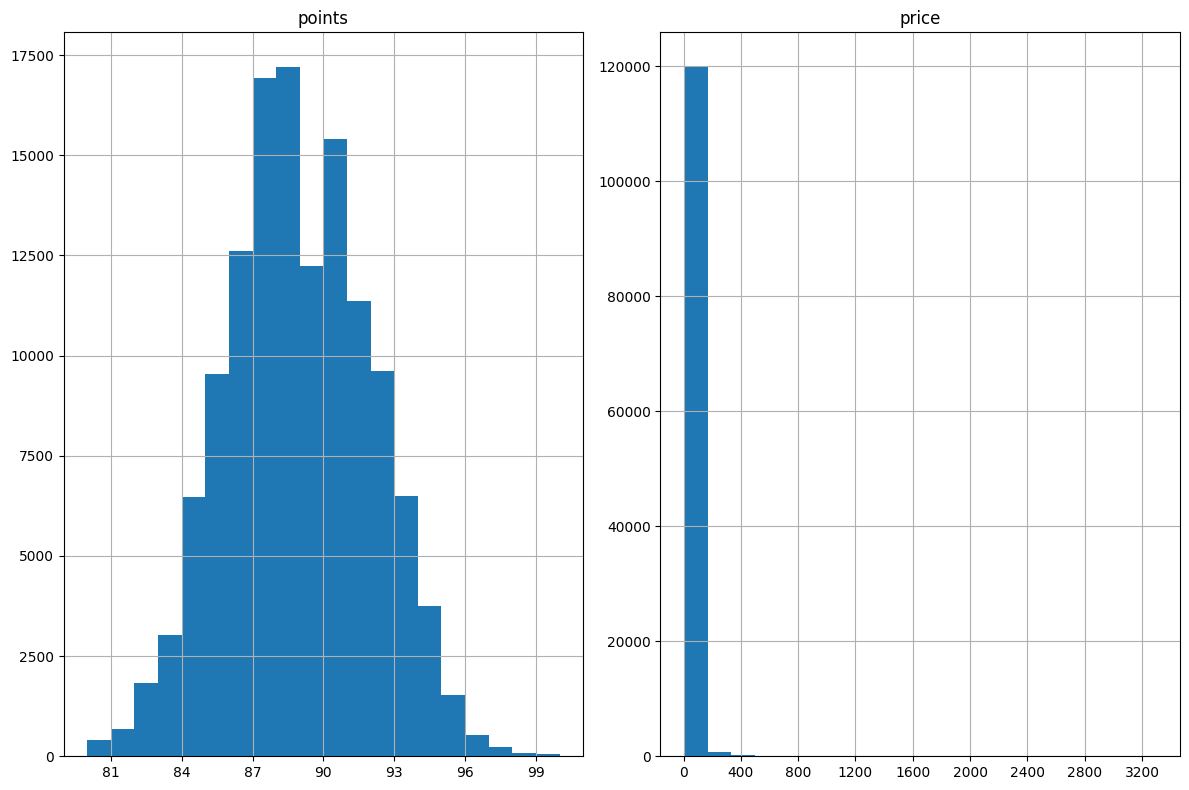

In [125]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

axes = df[num_cols].hist(bins=20, figsize=(12, 8))
for ax in axes.ravel():
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()

##### Histogram for price in logarithmic scale

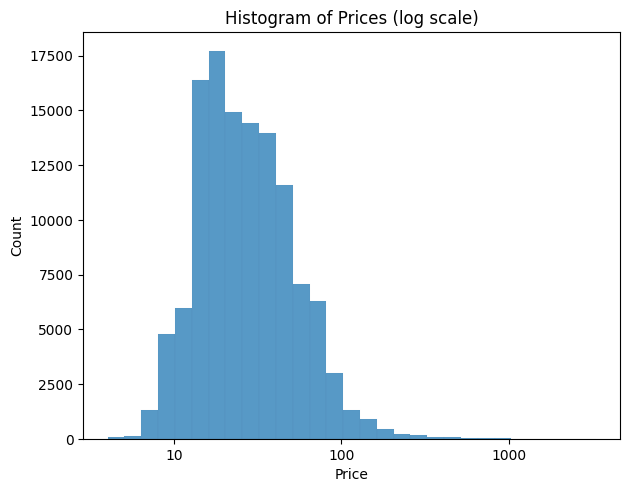

In [126]:
import seaborn as sns
import numpy as np
from matplotlib.ticker import LogLocator, ScalarFormatter, NullFormatter

price = df["price"].dropna()
bins = np.logspace(np.log10(price.min()), np.log10(price.max()), 30)

sns.histplot(price, bins=bins)
ax = plt.gca()

ax.set_xscale("log")
ax.xaxis.set_major_locator(LogLocator(base=10, numticks=6))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(LogLocator(base=10, subs=[]))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.ticklabel_format(style="plain", axis="x")

plt.xlabel("Price")
plt.tight_layout()
plt.title("Histogram of Prices (log scale)")
plt.show()

##### Price vs Points

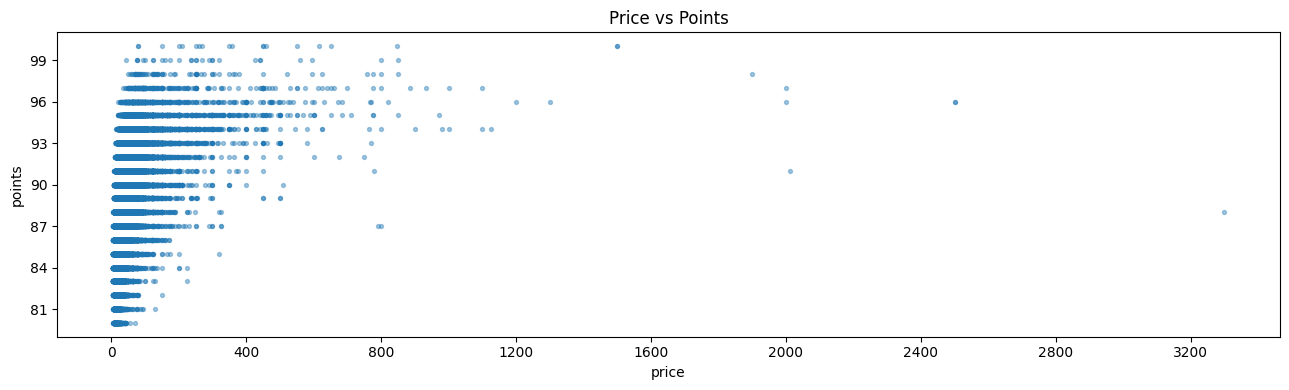

In [127]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

tmp = df[["points", "price"]].dropna()

fig, ax = plt.subplots(figsize=(13,4))
ax.scatter(tmp["price"], tmp["points"], alpha=0.4, s=8)
ax.set_xlabel("price")
ax.set_ylabel("points")
ax.set_title("Price vs Points")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

### Categorical features

#### Categorical columns overview


In [128]:
df.describe(include="object").T.sort_values("unique", ascending=False)

,count,unique,top,freq
description,129971,119955,"Seductively tart in lemon pith, cranberry and ...",3
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11
designation,92506,37979,Reserve,2009
winery,129971,16757,Wines & Winemakers,222
region_1,108724,1229,Napa Valley,4480
variety,129970,707,Pinot Noir,13272
province,129908,425,California,36247
country,129908,43,US,54504
taster_name,103727,19,Roger Voss,25514
region_2,50511,17,Central Coast,11065


#### Top categories (barplots)


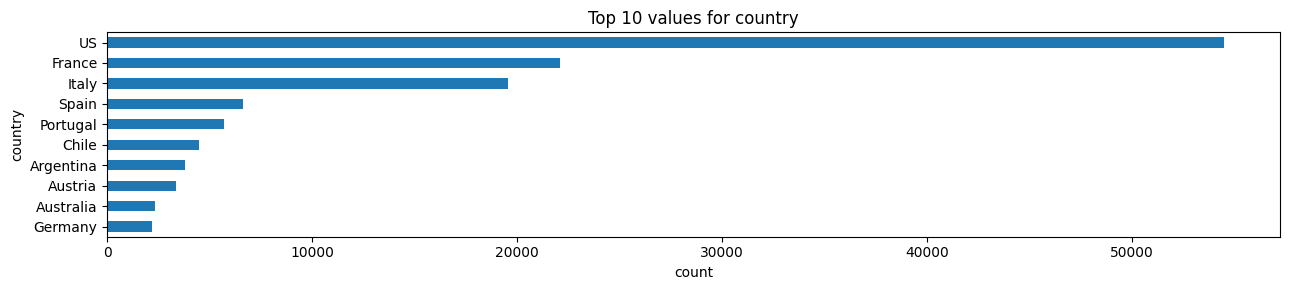

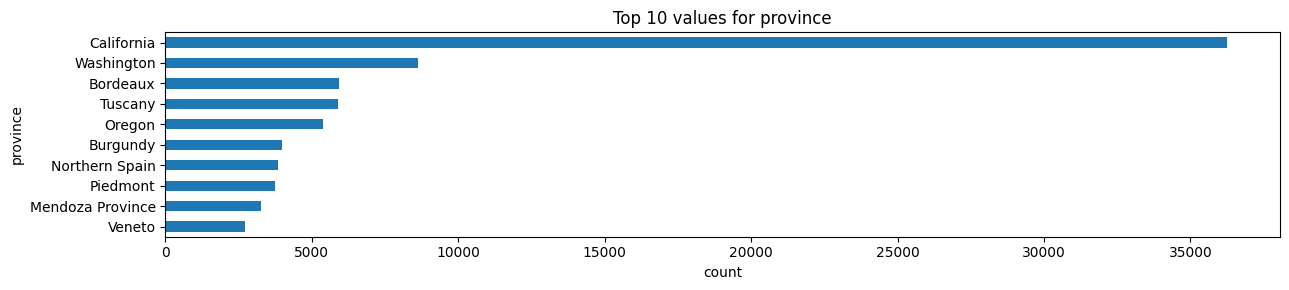

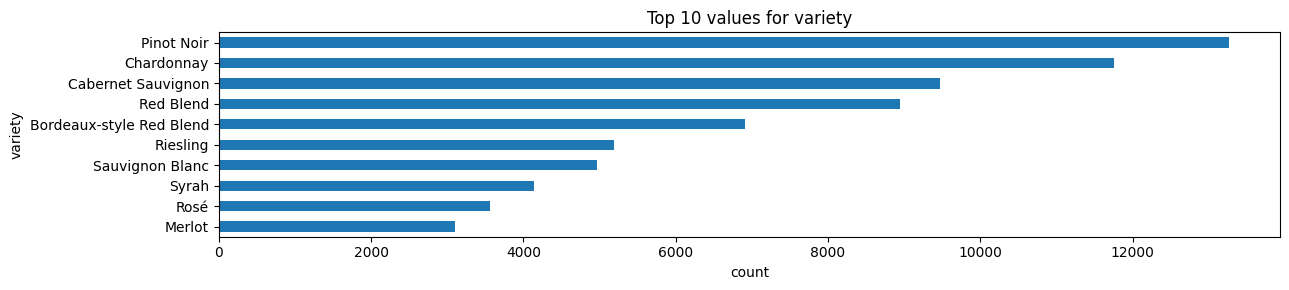

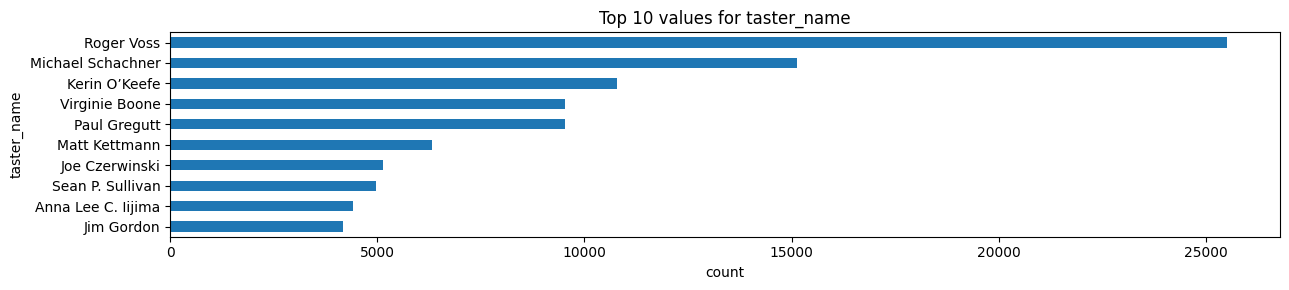

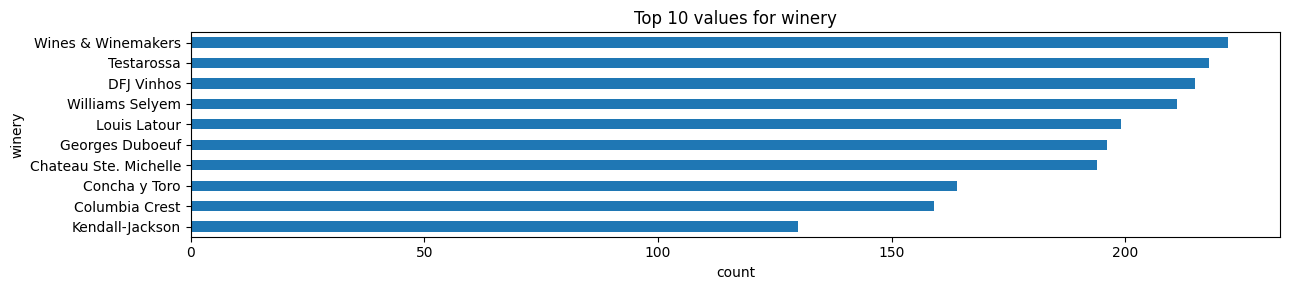

In [129]:
import matplotlib.pyplot as plt

top_n = 10
plot_cols = [c for c in ["country", "province", "variety", "taster_name", "winery"] if c in df.columns]

for col in plot_cols:
    vc = df[col].value_counts().head(top_n).sort_values()
    ax = vc.plot(kind="barh", figsize=(13,3), title=f"Top {top_n} values for {col}")
    ax.set_xlabel("count")
    plt.tight_layout()
    plt.show()


#### Rank-frequency plots

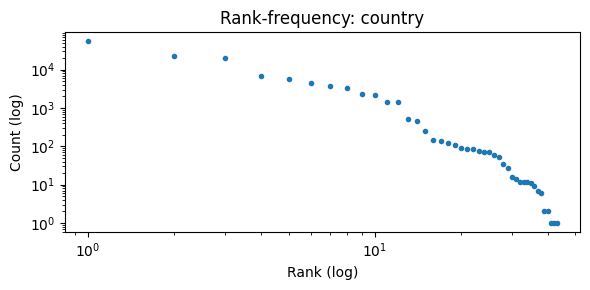

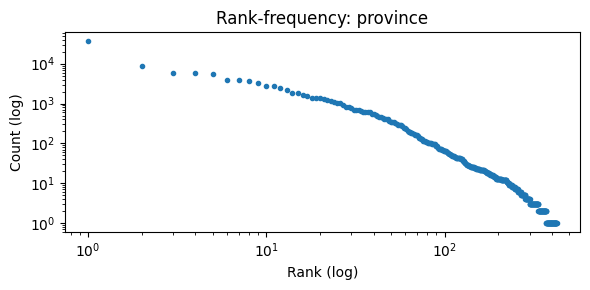

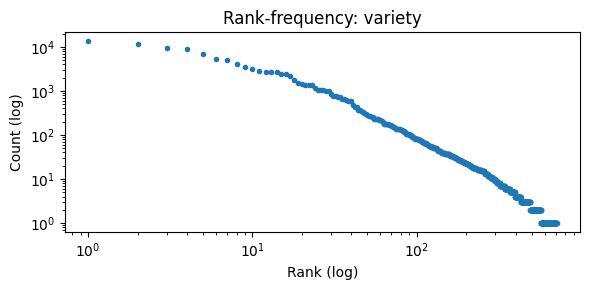

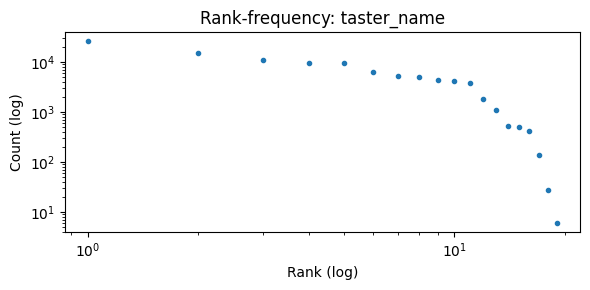

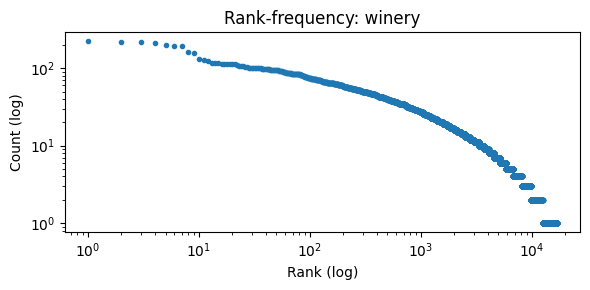

In [130]:
import matplotlib.pyplot as plt

plot_cols = [c for c in ["country", "province", "variety", "taster_name", "winery"] if c in df.columns]

for col in plot_cols:
    vc = df[col].value_counts()
    ranks = range(1, len(vc) + 1)

    plt.figure(figsize=(6,3))
    plt.plot(ranks, vc.values, marker=".", linestyle="none")
    plt.xscale("log")
    plt.yscale("log")
    plt.title(f"Rank-frequency: {col}")
    plt.xlabel("Rank (log)")
    plt.ylabel("Count (log)")
    plt.tight_layout()
    plt.show()


#### Testers

In [131]:
df["taster_name"].dropna().value_counts()

taster_name
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: count, dtype: int64

<Axes: title={'center': 'Number of reviews for tester'}, xlabel='taster_name'>

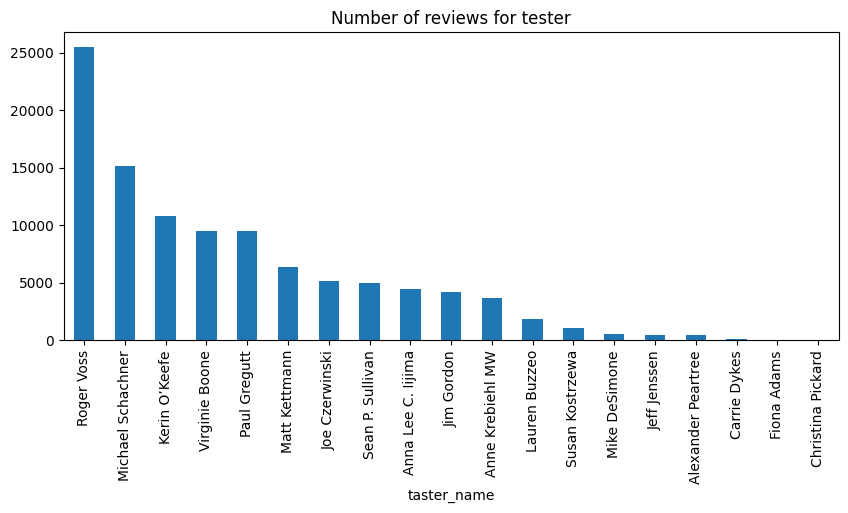

In [132]:
df["taster_name"].dropna().value_counts().plot(kind="bar", figsize=(10,4), title="Number of reviews for tester")

## Missing values

#### Missing values summary (sorted)


In [133]:
missing = df.isna().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "missing": missing,
    "missing_pct": missing_pct,
})
missing_df = missing_df[missing_df["missing"] > 0].sort_values("missing_pct", ascending=False)
display(missing_df)


,missing,missing_pct
region_2,79460,61.14
designation,37465,28.83
taster_twitter_handle,31213,24.02
taster_name,26244,20.19
region_1,21247,16.35
price,8996,6.92
country,63,0.05
province,63,0.05
variety,1,0.00


#### Missing values heatmap (sample)


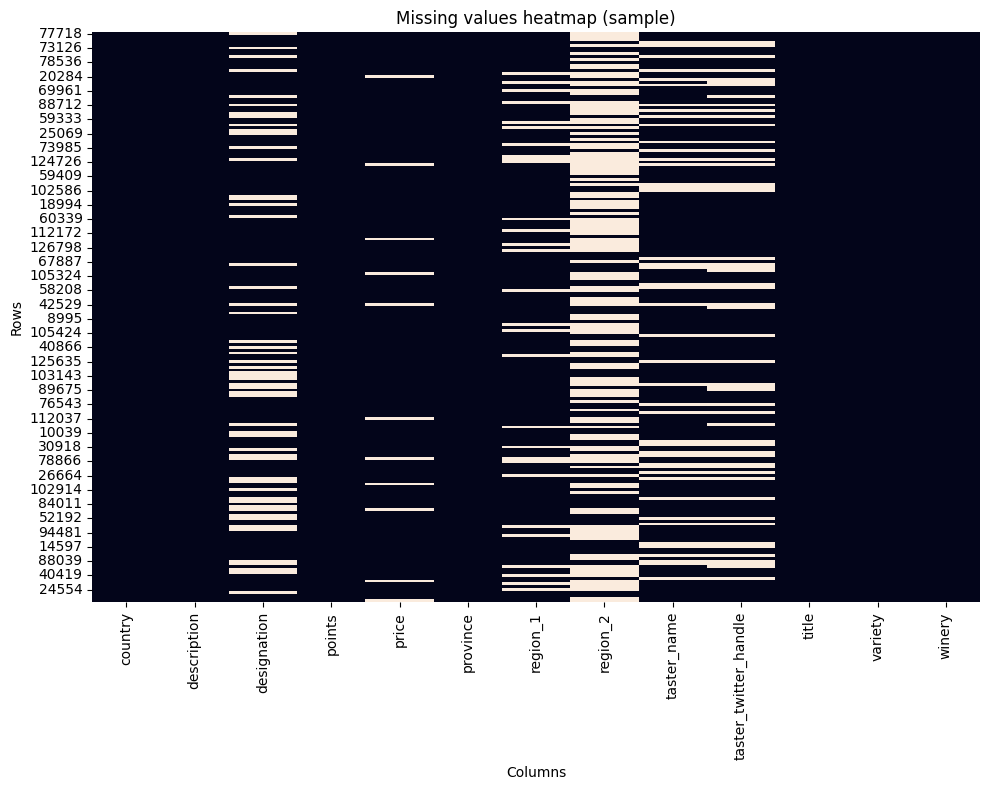

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

sample = df.sample(200, random_state=42) if len(df) > 1000 else df

plt.figure(figsize=(10,8))
sns.heatmap(sample.isna(), cbar=False)
plt.title("Missing values heatmap (sample)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()


#### Columns above missing threshold


In [135]:
threshold = 21
cols_high_missing = missing_df[missing_df["missing_pct"] > threshold].index.tolist()
cols_high_missing

['region_2', 'designation', 'taster_twitter_handle']